## Alla muutamat asennukset, joita tarvitsemme



### Vain toinen riittää
- (CUDA-tuettu näyttis) **pip install pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121**
    - (Pelkkä  CPU) **pip3 install torch torchvision torchaudio**
### Kaikki nämä
- pip install notebook
- pip install numpy
- pip install matplotlib.pyplot
- pip install opencv-python
---
### Tarkista asennukset ajamalla alla oleva komento
- pip list
---
### COCO = Common Objects in Context dataset labels
https://tech.amikelive.com/node-718/what-object-categories-labels-are-in-coco-dataset/

In [217]:
import torch
import torchvision
from torchvision.models.detection import fasterrcnn_mobilenet_v3_large_320_fpn
from torchvision.transforms import functional as F
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

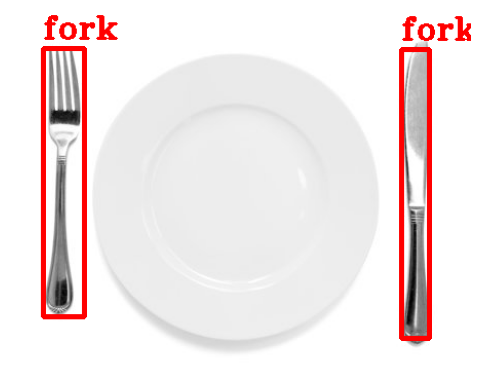

In [219]:

model = fasterrcnn_mobilenet_v3_large_320_fpn(pretrained=True)
model.eval()

## Kuvien merkitsemis labeleiden sijainti
with open('labels/coco-labels-2014_2017.txt') as f:
    class_labels = f.read().splitlines()

def draw_targetAndBox(image_path):
    image = Image.open(image_path)
    image = np.array(image)

    with torch.no_grad():
        prediction = model([F.to_tensor(image)])

    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    for box, label in zip(prediction[0]['boxes'], prediction[0]['labels']):
        if label == 48:
            box = [int(b) for b in box]
            label_text = f'{class_labels[label]}'
            cv2.rectangle(image, (box[0], box[1]), (box[2], box[3]), (0, 0, 255), 3)
            cv2.putText(image, label_text, (box[0], box[1] - 10), cv2.FONT_HERSHEY_TRIPLEX, 1.0, (0, 0, 255), 2)

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.imshow(image)
    plt.axis('off')
    plt.show()

## Vaihda kuvan polku tähän. Käytä vain polun loppuosaa kuvan valitsemiseen
image_path = 'images/serving.jpg'

draw_targetAndBox(image_path)
